In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#set plotting style for later on in notebook
sns.set(style='whitegrid')

#read in our data to a pandas DataFrame
telcom_data = pd.read_csv('telcom_data.csv')

#missing values were filled with a blank space, this changes them to NaN
telcom_data.TotalCharges = telcom_data.TotalCharges.replace(' ',np.nan,regex=True)

#formatting columns to be of the correct data type
telcom_data.customerID = telcom_data.customerID.astype('str')
telcom_data.gender = telcom_data.gender.astype('category')
telcom_data.SeniorCitizen = telcom_data.SeniorCitizen.astype('category')
telcom_data.Partner = telcom_data.Partner.astype('category')
telcom_data.Dependents = telcom_data.Dependents.astype('category')
telcom_data.tenure = telcom_data.tenure.astype('int')
telcom_data.PhoneService = telcom_data.PhoneService.astype('category')
telcom_data.MultipleLines = telcom_data.MultipleLines.astype('category')
telcom_data.InternetService = telcom_data.InternetService.astype('category')
telcom_data.OnlineSecurity = telcom_data.OnlineSecurity.astype('category')
telcom_data.OnlineBackup = telcom_data.OnlineBackup.astype('category')
telcom_data.DeviceProtection = telcom_data.DeviceProtection.astype('category')
telcom_data.TechSupport = telcom_data.TechSupport.astype('category')
telcom_data.StreamingTV = telcom_data.StreamingTV.astype('category')
telcom_data.StreamingMovies = telcom_data.StreamingMovies.astype('category')
telcom_data.Contract = telcom_data.Contract.astype('category')
telcom_data.PaperlessBilling = telcom_data.PaperlessBilling.astype('category')
telcom_data.PaymentMethod = telcom_data.PaymentMethod.astype('category')
telcom_data.TotalCharges = pd.to_numeric(telcom_data.TotalCharges)
telcom_data.Churn = telcom_data.Churn.astype('category')

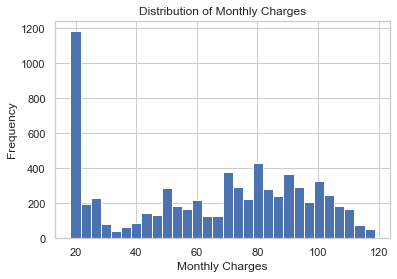

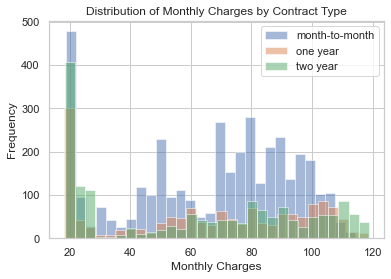

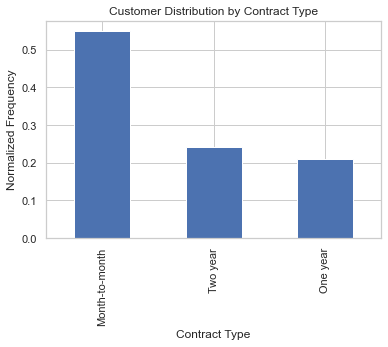

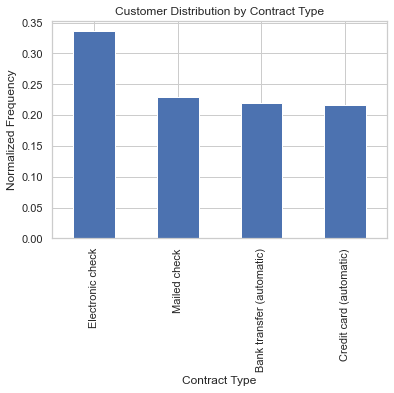

In [2]:
#plots a histogram of the Monthly Charges data
plt.hist(telcom_data.MonthlyCharges,bins=30)
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')
plt.show()

#segments data by contract type and then plots histogram with 3 categories
monthly_charge_month = telcom_data.MonthlyCharges[telcom_data.Contract == 'Month-to-month']
monthly_charge_year = telcom_data.MonthlyCharges[telcom_data.Contract == 'One year']
monthly_charge_two_year = telcom_data.MonthlyCharges[telcom_data.Contract == 'Two year']
plt.hist(monthly_charge_month,alpha=0.5,bins=30,label='month-to-month')
plt.hist(monthly_charge_year,alpha=0.5,bins=30,label='one year')
plt.hist(monthly_charge_two_year,alpha=0.5,bins=30,label='two year')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges by Contract Type')
plt.legend()
plt.show()

#plots normalized histogram so we can see what proportion of customers had which contracts
telcom_data.Contract.value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Contract Type')
plt.ylabel('Normalized Frequency')
plt.title('Customer Distribution by Contract Type')
plt.show()

#plots normalized histogram so we can see what proportion of customers paid with which payment methods
telcom_data.PaymentMethod.value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Contract Type')
plt.ylabel('Normalized Frequency')
plt.title('Customer Distribution by Contract Type')
plt.show()

Below are the first few relevant plots in my Exporatory Data Analysis (EDA). As can be seen, there's a nice collection of monthly charges between $70-100 per month and then a huge spike at $20 per month, which is probably for people with just one service (it appears to be those customers with just phone service). If we take a closer look at this histogram and split out the data by contract type, it looks as if not only do month-to-month customers make up a majority of the customer base, but they also seem to pay higher bills on average (as well as a large clustering around that $20 per month mark). To verify this, we look at a normalized bar chart of customers by contract duration and see that nearly 55% of our customers are on a month-to-month plan, while there is a more even split between 1 and 2 year contract customers, with slightly more customers opting for a 2 year contract.

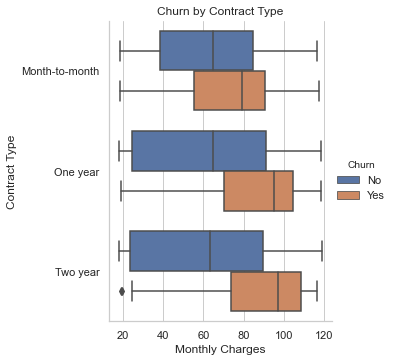

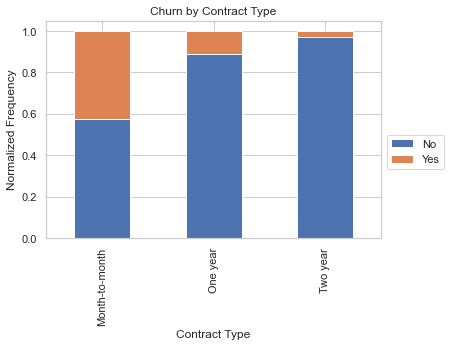

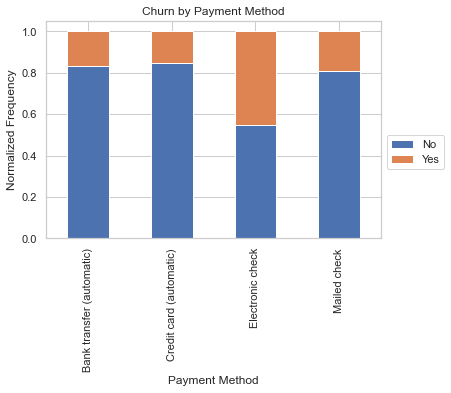

In [3]:
#box and whisker plot of contract type separated by whether a customer churned or not
sns.catplot(x='MonthlyCharges',y='Contract',hue='Churn',data=telcom_data,kind='box')
plt.xlabel('Monthly Charges')
plt.ylabel('Contract Type')
plt.title('Churn by Contract Type')
plt.show()

#normalized bar graph of contract type split by churn
churn_by_contract = telcom_data.groupby('Contract').Churn.value_counts(normalize=True)
churn_by_contract.unstack().plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.0,0.5))
plt.xlabel('Contract Type')
plt.ylabel('Normalized Frequency')
plt.title('Churn by Contract Type')
plt.show()

#normalized bar graph of payment methods split by churn
churn_by_payment = telcom_data.groupby('PaymentMethod').Churn.value_counts(normalize=True)
churn_by_payment.unstack().plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.0,0.5))
plt.xlabel('Payment Method')
plt.ylabel('Normalized Frequency')
plt.title('Churn by Payment Method')
plt.show()

After taking an initial look at some the more important features in this dataset, we drill down further to get an idea on what might be affecting a customer's willingness to stay with our client, the telecom company. To get a sense of this, we first look at a box-and-whisker plot where we compare monthly charges by contract type, and split out these distributions in terms of those customers who churned and those who did not. Across contract types, there does not appear to be a big difference in average monthly bill for those who did not churn. However, across all contract types, we can see that on average, the customers who churned had a significantly higher monthly average bill. Since a higher average bill is correlated with more services purchased by a customer, possible reasons for leaving could be going to competitors to get better introductory bundle prices coupled with a large increase in price after promotional pricing expired. These are things to keep in mind for potential marketing strategies on customer retention when our analysis is complete. 

Since the box-and-whisker plot only tells part of the story for this data (mainly it does not give us any sense of what proportion of customers churned for each contract type), it's important to analyze this data a bit further. Looking at a normalized histogram shows us that over 40% of month-to-month customers end up leaving the company; this is large cause for concern and a big insight into reducing churn within our customer base. Roughly 10% of customers with a 1 year contact churn and a very small portion of customers with a 2 year contract end up churning. Another strategy to keep in mind when returning to our stakeholders upon completion of our study is how can we convert more of our customer base to 1 and 2 year contracts while retaining desired profitability. 

In addition to looking at churn by contract type, churn by payment method also stood out as significant in my EDA. The normalized bar graph shows that customers who pay with an electronic check are far more likely to churn than any customers who pay with any other payment method with a churn rate of over 40%. The bad news gets worse here as this is the most widely used payment method for our customer base, with roughly a third of our customers opting to pay with an electronic check. Some questions come to mind to discuss with our stakeholders: can we incentivize customers to pay with a different method, and can we consider possibly eliminating this payment method altogether? 

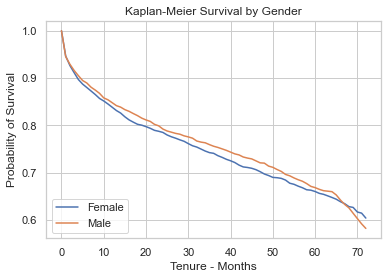

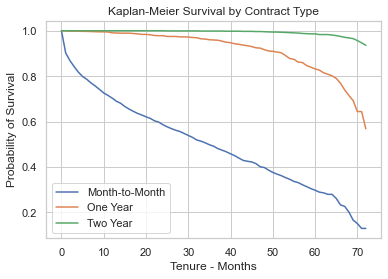

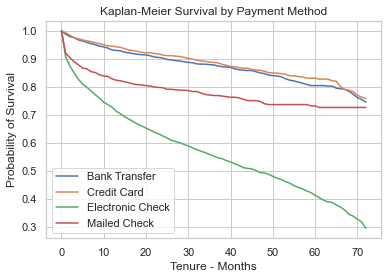

In [4]:
from pysurvival.models.non_parametric import KaplanMeierModel
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
telcom_data.gender = le_gender.fit_transform(telcom_data.gender)
le_senior = LabelEncoder()
telcom_data.SeniorCitizen = le_senior.fit_transform(telcom_data.SeniorCitizen)
le_partner = LabelEncoder()
telcom_data.Partner = le_partner.fit_transform(telcom_data.Partner)
le_dependents = LabelEncoder()
telcom_data.Dependents = le_dependents.fit_transform(telcom_data.Dependents)
le_phone = LabelEncoder()
telcom_data.PhoneService = le_phone.fit_transform(telcom_data.PhoneService)
le_multi = LabelEncoder()
telcom_data.MultipleLines = le_multi.fit_transform(telcom_data.MultipleLines)
le_internet = LabelEncoder()
telcom_data.InternetService = le_internet.fit_transform(telcom_data.InternetService)
le_security = LabelEncoder()
telcom_data.OnlineSecurity = le_security.fit_transform(telcom_data.OnlineSecurity)
le_backup = LabelEncoder()
telcom_data.OnlineBackup = le_backup.fit_transform(telcom_data.OnlineBackup)
le_protection = LabelEncoder()
telcom_data.DeviceProtection = le_protection.fit_transform(telcom_data.DeviceProtection)
le_support = LabelEncoder()
telcom_data.TechSupport = le_support.fit_transform(telcom_data.TechSupport)
le_s_tv = LabelEncoder()
telcom_data.StreamingTV = le_s_tv.fit_transform(telcom_data.StreamingTV)
le_s_movie = LabelEncoder()
telcom_data.StreamingMovies = le_s_movie.fit_transform(telcom_data.StreamingMovies)
le_contract = LabelEncoder()
telcom_data.Contract = le_contract.fit_transform(telcom_data.Contract)
le_billing = LabelEncoder()
telcom_data.PaperlessBilling = le_billing.fit_transform(telcom_data.PaperlessBilling)
le_payment = LabelEncoder()
telcom_data.PaymentMethod = le_payment.fit_transform(telcom_data.PaymentMethod)
le_churn = LabelEncoder()
telcom_data.Churn = le_churn.fit_transform(telcom_data.Churn)

T_male = telcom_data[telcom_data.gender == 1].tenure
E_male = telcom_data[telcom_data.gender== 1].Churn
T_female = telcom_data[telcom_data.gender == 0].tenure
E_female = telcom_data[telcom_data.gender == 0].Churn
km_male_model = KaplanMeierModel()
km_male_model.fit(T_male, E_male, alpha=0.95)
km_female_model = KaplanMeierModel()
km_female_model.fit(T_female, E_female, alpha=0.95)
plt.plot(km_female_model.times, km_female_model.survival,label='Female')
plt.plot(km_male_model.times, km_male_model.survival,label='Male')
plt.xlabel('Tenure - Months')
plt.ylabel('Probability of Survival')
plt.title('Kaplan-Meier Survival by Gender')
plt.legend(loc='lower left')
plt.show()

T_month = telcom_data[telcom_data.Contract == 0].tenure
E_month = telcom_data[telcom_data.Contract == 0].Churn
T_year = telcom_data[telcom_data.Contract == 1].tenure
E_year = telcom_data[telcom_data.Contract == 1].Churn
T_two_year = telcom_data[telcom_data.Contract == 2].tenure
E_two_year = telcom_data[telcom_data.Contract == 2].Churn
km_month_model = KaplanMeierModel()
km_month_model.fit(T_month, E_month)
km_year_model = KaplanMeierModel()
km_year_model.fit(T_year, E_year)
km_two_year_model = KaplanMeierModel()
km_two_year_model.fit(T_two_year, E_two_year)
plt.plot(km_month_model.times, km_month_model.survival,label='Month-to-Month')
plt.plot(km_year_model.times, km_year_model.survival,label='One Year')
plt.plot(km_two_year_model.times, km_two_year_model.survival,label='Two Year')
plt.xlabel('Tenure - Months')
plt.ylabel('Probability of Survival')
plt.title('Kaplan-Meier Survival by Contract Type')
plt.legend()
plt.show()

T_bank_transfer = telcom_data[telcom_data.PaymentMethod == 0].tenure
E_bank_transfer = telcom_data[telcom_data.PaymentMethod == 0].Churn
T_credit_card = telcom_data[telcom_data.PaymentMethod == 1].tenure
E_credit_card = telcom_data[telcom_data.PaymentMethod == 1].Churn
T_e_check = telcom_data[telcom_data.PaymentMethod == 2].tenure
E_e_check = telcom_data[telcom_data.PaymentMethod == 2].Churn
T_mail_check = telcom_data[telcom_data.PaymentMethod == 3].tenure
E_mail_check = telcom_data[telcom_data.PaymentMethod == 3].Churn
km_bank_transfer_model = KaplanMeierModel()
km_bank_transfer_model.fit(T_bank_transfer, E_bank_transfer)
km_credit_card_model = KaplanMeierModel()
km_credit_card_model.fit(T_credit_card, E_credit_card)
km_e_check_model = KaplanMeierModel()
km_e_check_model.fit(T_e_check, E_e_check)
km_mail_check_model = KaplanMeierModel()
km_mail_check_model.fit(T_mail_check, E_mail_check)
plt.plot(km_bank_transfer_model.times, km_bank_transfer_model.survival,label='Bank Transfer')
plt.plot(km_credit_card_model.times, km_credit_card_model.survival,label='Credit Card')
plt.plot(km_e_check_model.times, km_e_check_model.survival,label='Electronic Check')
plt.plot(km_mail_check_model.times, km_mail_check_model.survival,label='Mailed Check')
plt.xlabel('Tenure - Months')
plt.ylabel('Probability of Survival')
plt.title('Kaplan-Meier Survival by Payment Method')
plt.legend()
plt.show()

All else equal, we'd rather have a customer churn after more months with our company than fewer as that means higher lifetime value. For that reason, it makes sense to further analyze some of the churn categories we've been looking at to how likely groups of customers are to churn over time. We first take a look at gender and see that there is no real discernible difference in churn over time if you are male or female. 

Now, we focus in again on contract type and payment method, our categories of interest. To do this, I now use the Kaplan-Meier estimator to generate a plot of survival over time, which allows us to look at how likely a customer is to stay with the company over time (in months). The hunches that we may have had from plots before are confirmed: those most likely to churn overall show noticeably worse churn across time as well. When we look at survival by contract type over time, we see that the survival curve for customers with a month-to-month contract decays very quickly relative to customers with 1 and 2 year plans. In the 2 year contract cohort, we notice almost no decay over time, as we could more or less infer from our normalized histogram from before. However, we do notice that customers with a 1 year contract start to develop an exponentially decreasing chance of survival starting from around the 30th month. While a customer with a 1 year contract is certainly preferable to a month-to-month customer in terms of survival alone, there is still potentially some very significant work to be done to help our telecom client retain customers in the 1 year contract group. 

Next, it's time to look at our survival curves by payment method. As we recall from before, customers who paid by electronic check were most likely to churn (and therefore least likely to survive). This is evident in the survival curve as a mere roughly 30% of customers who pay by electronic check are predicted to have survived by the end of our 72 month horizon for tracking survival. All other methods have similar ending probabilities of survival (somewhere in the low to mid 70% range), but those who pay by mailed check survive at a lower rate across tenure than either the bank transfer or credit card clients. 

Insights gained from our EDA seem to be telling a consistent story. It seems on a surface level that we need to discuss with our stakeholders the pros and cons of each payment method for both the business and customers and we also need to look at either heavily incentivizing customers to go with a 2 or 1 year contract or potentially even remove the month-to-month option altogether. Before we present anything to our stakeholders though, we will further vet our data with machine learning techniques and make sure our models agree with our analysis up to this point as well as include further insights gained from our machine learning models. 